In [1]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [2]:
import pandas as pd

pd.__version__

'0.24.2'

In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import folium
from folium import Map
from folium.plugins import HeatMap

folium.__version__

'0.10.0'

In [8]:
import matplotlib.font_manager as fm

[font for font in fm.fontManager.ttflist if 'Gothic' in font.name]

[<Font 'Century Gothic' (GOTHICBI.TTF) italic normal bold normal>,
 <Font 'Century Gothic' (GOTHICB.TTF) normal normal bold normal>,
 <Font 'HYGothic-Extra' (H2GTRE.TTF) normal normal 400 normal>,
 <Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>,
 <Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>,
 <Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>,
 <Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>,
 <Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>,
 <Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>,
 <Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>,
 <Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>,
 <Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>,
 <Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>,
 <Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>,
 <Font 'Franklin Gothic Medium Cond' (FRAM

In [25]:
plt.rcParams['font.family'] = 'NanumGothic'

In [12]:
df = pd.read_csv('animal.csv', encoding='euc-kr')

df.columns

Index(['동물보호센터명', '관리기관명', '동물보호센터유형', '구조대상동물', '소재지도로명주소', '소재지지번주소', '위도',
       '경도', '동물보호센터지정일자', '평일운영시작시각', '평일운영종료시각', '평일분양시작시각', '평일분양종료시각',
       '주말운영시작시각', '주말운영종료시각', '주말분양시작시각', '주말분양종료시각', '휴무일', '수의사인원수',
       '사양관리사인원수', '진료실수', '사육실수', '격리실수', '사료보관실수', '구조운반용차량보유대수', '전화번호',
       '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29'],
      dtype='object')

In [13]:
df.shape

(188, 30)

In [15]:
df.head(1)

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,소재지지번주소,위도,경도,동물보호센터지정일자,평일운영시작시각,...,진료실수,사육실수,격리실수,사료보관실수,구조운반용차량보유대수,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
0,인천수의사회 유기동물보호소,인천수의사회,법인,「동물보호법」에 따른 유실·유기동물,인천광역시 계양구 다남로165번길 56(다남동),NaN,37.566196,126.71963,2006-10-18,09:00,...,NaN,NaN,NaN,NaN,NaN,032-515-7567,2018-08-13,3520000,인천광역시 연수구,NaN


In [16]:
df.isnull().sum()

동물보호센터명          0
관리기관명            0
동물보호센터유형         0
구조대상동물           0
소재지도로명주소         4
소재지지번주소         30
위도               0
경도               0
동물보호센터지정일자       0
평일운영시작시각         0
평일운영종료시각         0
평일분양시작시각        39
평일분양종료시각        39
주말운영시작시각        69
주말운영종료시각        69
주말분양시작시각        84
주말분양종료시각        84
휴무일              0
수의사인원수           0
사양관리사인원수         0
진료실수            45
사육실수            39
격리실수            39
사료보관실수          43
구조운반용차량보유대수     36
전화번호             0
데이터기준일자          0
제공기관코드           0
제공기관명            0
Unnamed: 29    188
dtype: int64

In [17]:
simple_df = df.drop(columns=[
    '소재지지번주소', '동물보호센터지정일자',
    '평일운영시작시각', '평일운영종료시각', '평일분양시작시각', '평일분양종료시각',
    '주말운영시작시각', '주말운영종료시각', '주말분양시작시각', '주말분양종료시각',
    '진료실수', '사육실수', '격리실수', '사료보관실수', '구조운반용차량보유대수', '전화번호',
    '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29'
])

simple_df.head()

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,위도,경도,휴무일,수의사인원수,사양관리사인원수
0,인천수의사회 유기동물보호소,인천수의사회,법인,「동물보호법」에 따른 유실·유기동물,인천광역시 계양구 다남로165번길 56(다남동),37.566196,126.719630,연중무휴,1,3
1,사단법인 한국동물구조관리협회,도봉구청,법인,유실·유기 및 피학대동물,경기도 양주시 남면 감악산로 63-37,37.870072,126.983225,연중무휴,1,6
2,수성동물병원,화성시,개인,"개, 고양이",경기도 화성시 남양읍 남양성지로34,37.205577,126.807191,일요일,1,1
3,청산동물병원,화성시,개인,"개, 고양이",경기도 화성시 우정읍 3.1만세로29,37.082177,126.817192,일요일,1,2
4,인천광역시수의사회유기동물보호소,인천시수의사회,단체,"유기, 유실동물",인천광역시 계양구 다남로165번길 56(다남동),37.566196,126.719630,없음,1,3


In [18]:
simple_df.shape

(188, 10)

In [21]:
data = simple_df['동물보호센터유형'].value_counts()

pd.DataFrame(data)

,동물보호센터유형
동물병원,85
법인,44
개인,32
단체,27


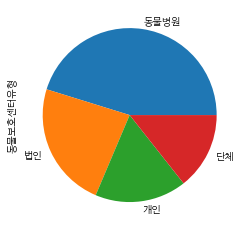

In [27]:
data = simple_df['동물보호센터유형'].value_counts()
data.plot.pie()

plt.show()

In [28]:
data = simple_df['휴무일'].value_counts().nlargest(10)

pd.DataFrame(data)

,휴무일
연중무휴,39
일요일,32
없음,22
공휴일,18
매주 일요일,6
토요일+일요일,6
일요일+공휴일,5
토요일+일요일+공휴일,4
주말+공휴일,4
주말 및 공휴일,3


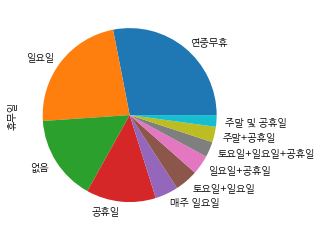

In [29]:
data = simple_df['휴무일'].value_counts().nlargest(10)

data.plot.pie()

plt.show()

In [31]:
data = simple_df['수의사인원수'].value_counts()

pd.DataFrame(data)

,수의사인원수
1,124
0,37
2,18
3,3
5,2
21,1
20,1
7,1
6,1


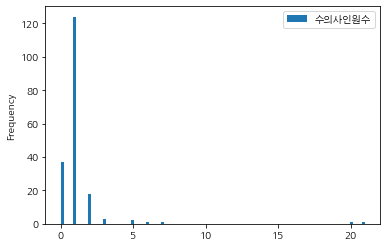

In [39]:
simple_df[['동물보호센터명', '수의사인원수']].plot.hist(bins=100, rwidth=10)
# simple_df['수의사인원수'].plot.hist(bins=100, rwidth=10)

plt.show()

In [40]:
data = simple_df['사양관리사인원수'].value_counts()

pd.DataFrame(data)

,사양관리사인원수
1,73
2,32
3,19
0,17
5,13
4,11
6,8
7,7
8,4
29,1


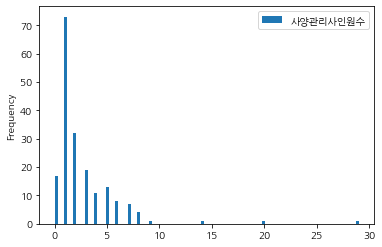

In [43]:
simple_df[['동물보호센터명', '사양관리사인원수']].plot.hist(bins=100, rwidth=10)

plt.show()

In [44]:
address_df = simple_df[simple_df['소재지도로명주소'].notnull()]

simple_df.shape, address_df.shape

((188, 10), (184, 10))

In [49]:
address_df[address_df['소재지도로명주소'].str.contains('서울')]

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,위도,경도,휴무일,수의사인원수,사양관리사인원수
34,서초동물사랑센터,서초구청 지역경제과,법인,개,서울특별시 서초구 양재천로19길 22 (양재동),37.476332,127.038124,"매주월요일, 법정공휴일(일요일제외)",0,5
121,러브펫종합동물병원,서울특별시 관악구청,동물병원,개+고양이+기타유기동물,서울특별시 관악구 남부순환로 1451,37.481566,126.912010,연중무휴,2,5
173,강현림동물병원,서울특별시 양천구청,동물병원,반려동물,서울특별시 양천구 등촌로 160,37.543980,126.862417,매주일요일,1,2


In [68]:
map = Map(location=[36.5, 127.5], zoom_start=7)

data = simple_df[['위도', '경도']].groupby(['위도', '경도']).sum().reset_index().values.tolist()

HeatMap(data=data, radius=20).add_to(map)

for lat, lng in data:
    marker = folium.Circle(
    location=[lat, lng],
    radius=500,
    weight=1,
    fill_color='#F00',
    fill_opacity=0.3,
    )
    marker.add_to(map)
    
map